In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import seaborn as sns
from scipy import stats
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [46]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/cw_mass_split/'

# initiating catalog class object for all galaxies.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total_cen = copy.deepcopy(total) ; total_sat = copy.deepcopy(total)
total_high_mass = copy.deepcopy(total) ; total_low_mass = copy.deepcopy(total) 

total_cen.group_membership(sel='cen', group_cat='lim') 
total_sat.group_membership(sel='sat', group_cat='lim') 
total_cen_high_mass = copy.deepcopy(total_cen) ; total_cen_low_mass = copy.deepcopy(total_cen) 
total_sat_high_mass = copy.deepcopy(total_sat) ; total_sat_low_mass = copy.deepcopy(total_sat) 

# also splitting on stellar mass.
mass_split = 10 #total.df.nsa_elpetro_mass_logscale.median()
total_low_mass.df = total_low_mass.df[total_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_high_mass.df = total_high_mass.df[total_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_cen_low_mass.df = total_cen_low_mass.df[total_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_cen_high_mass.df = total_cen_high_mass.df[total_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_sat_low_mass.df = total_sat_low_mass.df[total_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_sat_high_mass.df = total_sat_high_mass.df[total_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

In [48]:
# creating composite catalogues for etgs
etgs = copy.deepcopy(total) ; etgs.select_morphology('etg')
etgs_cen = copy.deepcopy(total_cen) ; etgs_cen.select_morphology('etg')
etgs_sat = copy.deepcopy(total_sat) ; etgs_sat.select_morphology('etg')
etgs_high_mass = copy.deepcopy(etgs) ; etgs_low_mass = copy.deepcopy(etgs) 

etgs_cen_high_mass = copy.deepcopy(etgs_cen) ; etgs_cen_low_mass = copy.deepcopy(etgs_cen) 
etgs_sat_high_mass = copy.deepcopy(etgs_sat) ; etgs_sat_low_mass = copy.deepcopy(etgs_sat) 

# also splitting on stellar mass.
mass_split = etgs.df.nsa_elpetro_mass_logscale.median()
etgs_low_mass.df = etgs_low_mass.df[etgs_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
etgs_high_mass.df = etgs_high_mass.df[etgs_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

etgs_cen_low_mass.df = etgs_cen_low_mass.df[etgs_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
etgs_cen_high_mass.df = etgs_cen_high_mass.df[etgs_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

etgs_sat_low_mass.df = etgs_sat_low_mass.df[etgs_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
etgs_sat_high_mass.df = etgs_sat_high_mass.df[etgs_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

# $D_{node}$

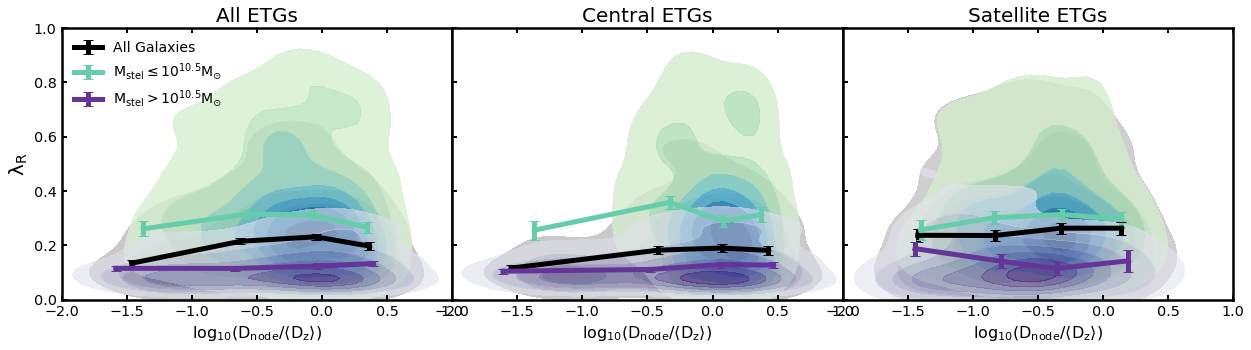

In [49]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(etgs.df.log_dnode_norm.values, np.linspace(20, 80, 3))

sns.kdeplot(etgs.df.log_dnode_norm, etgs.df.Lambda_Re, ax=ax[0], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(etgs_low_mass.df.log_dnode_norm, etgs_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_high_mass.df.log_dnode_norm, etgs_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
etgs_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
etgs_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(etgs_cen.df.log_dnode_norm.values, np.linspace(20, 80, 3))

sns.kdeplot(etgs_cen.df.log_dnode_norm, etgs_cen.df.Lambda_Re, ax=ax[1], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(etgs_cen_low_mass.df.log_dnode_norm, etgs_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_cen_high_mass.df.log_dnode_norm, etgs_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_cen.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
etgs_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
etgs_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(etgs_sat.df.log_dnode_norm.values, np.linspace(20, 80, 3))

sns.kdeplot(etgs_sat.df.log_dnode_norm, etgs_sat.df.Lambda_Re, ax=ax[2], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(etgs_sat_low_mass.df.log_dnode_norm, etgs_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_sat_high_mass.df.log_dnode_norm, etgs_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_sat.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
etgs_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
etgs_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All ETGs', 'Central ETGs', 'Satellite ETGs']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{node} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-2, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
#plt.savefig(outpath+'etg_lambdaR_dnode_mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')


# $D_{skel}$

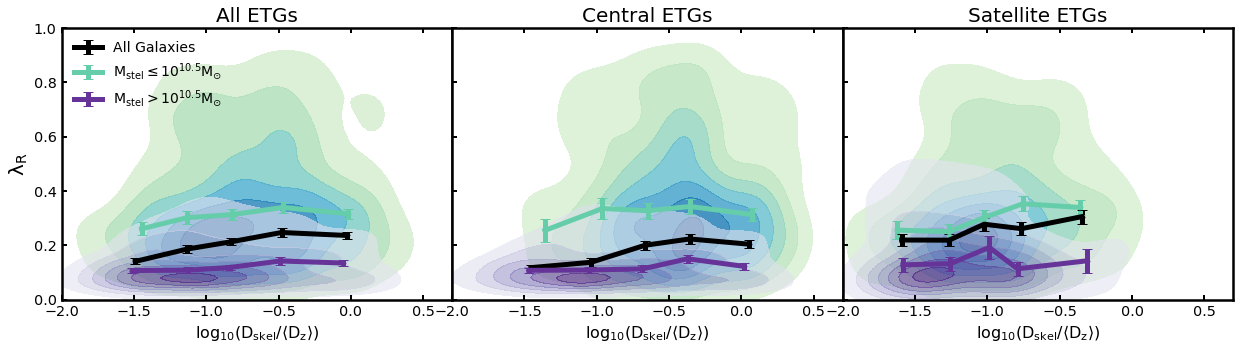

In [5]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(etgs.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_low_mass.df.log_dskel_norm, etgs_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_high_mass.df.log_dskel_norm, etgs_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
etgs_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
etgs_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(etgs_cen.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_cen_low_mass.df.log_dskel_norm, etgs_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_cen_high_mass.df.log_dskel_norm, etgs_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_cen.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
etgs_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
etgs_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(etgs_sat.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_sat_low_mass.df.log_dskel_norm, etgs_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_sat_high_mass.df.log_dskel_norm, etgs_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_sat.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
etgs_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
etgs_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All ETGs', 'Central ETGs', 'Satellite ETGs']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-2, 0.7])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'etg_lambdaR_dskel_mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')


# $D_{skel}$ ($D_{node}$ > 0.5Mpc)

In [6]:
node_dist = 0.5

etgs_filament = copy.deepcopy(etgs) 
etgs_cen_filament = copy.deepcopy(etgs_cen)
etgs_sat_filament = copy.deepcopy(etgs_sat)
etgs_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_cen_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_sat_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

etgs_low_mass_filament = copy.deepcopy(etgs_low_mass) 
etgs_cen_low_mass_filament = copy.deepcopy(etgs_cen_low_mass)
etgs_sat_low_mass_filament = copy.deepcopy(etgs_sat_low_mass)
etgs_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_cen_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_sat_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

etgs_high_mass_filament = copy.deepcopy(etgs_high_mass) 
etgs_cen_high_mass_filament = copy.deepcopy(etgs_cen_high_mass)
etgs_sat_high_mass_filament = copy.deepcopy(etgs_sat_high_mass)
etgs_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_cen_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
etgs_sat_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

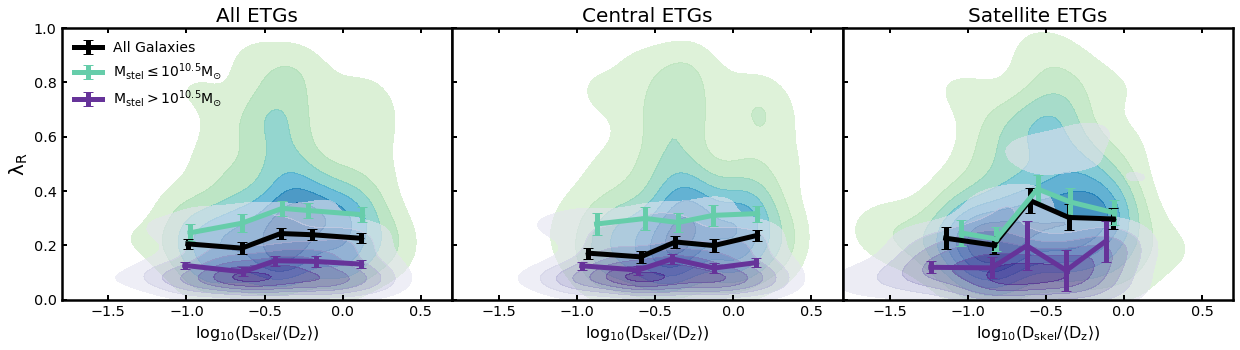

In [7]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(etgs_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_low_mass_filament.df.log_dskel_norm, etgs_low_mass_filament.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_high_mass_filament.df.log_dskel_norm, etgs_high_mass_filament.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
etgs_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
etgs_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(etgs_cen_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_cen_low_mass_filament.df.log_dskel_norm, etgs_cen_low_mass_filament.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_cen_high_mass_filament.df.log_dskel_norm, etgs_cen_high_mass_filament.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_cen_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
etgs_cen_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
etgs_cen_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(etgs_sat_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(etgs_sat_low_mass_filament.df.log_dskel_norm, etgs_sat_low_mass_filament.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(etgs_sat_high_mass_filament.df.log_dskel_norm, etgs_sat_high_mass_filament.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

etgs_sat_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
etgs_sat_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.5}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
etgs_sat_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.5}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All ETGs', 'Central ETGs', 'Satellite ETGs']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.8, 0.7])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'etg_lambdaR_dskel_no_node_mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')
